# Evolutionary Algorithms

An example of evolutionary algorithms, trying to solve the traveling salesman problem. https://en.wikipedia.org/wiki/Travelling_salesman_problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import sys
import matplotlib
libraries = (('Matplotlib', matplotlib), ('Numpy', np))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.7.11 (default, Jul 27 2021, 14:32:16) 
[GCC 7.5.0] 

Matplotlib Version: 3.4.3
Numpy Version: 1.19.2


{0: [-25.091976230527507, 90.14286128198324], 1: [46.39878836228101, 19.73169683940732], 2: [-68.79627191151269, -68.80109593275947], 3: [-88.3832775663601, 73.23522915498702], 4: [20.223002348641756, 41.61451555920911]}


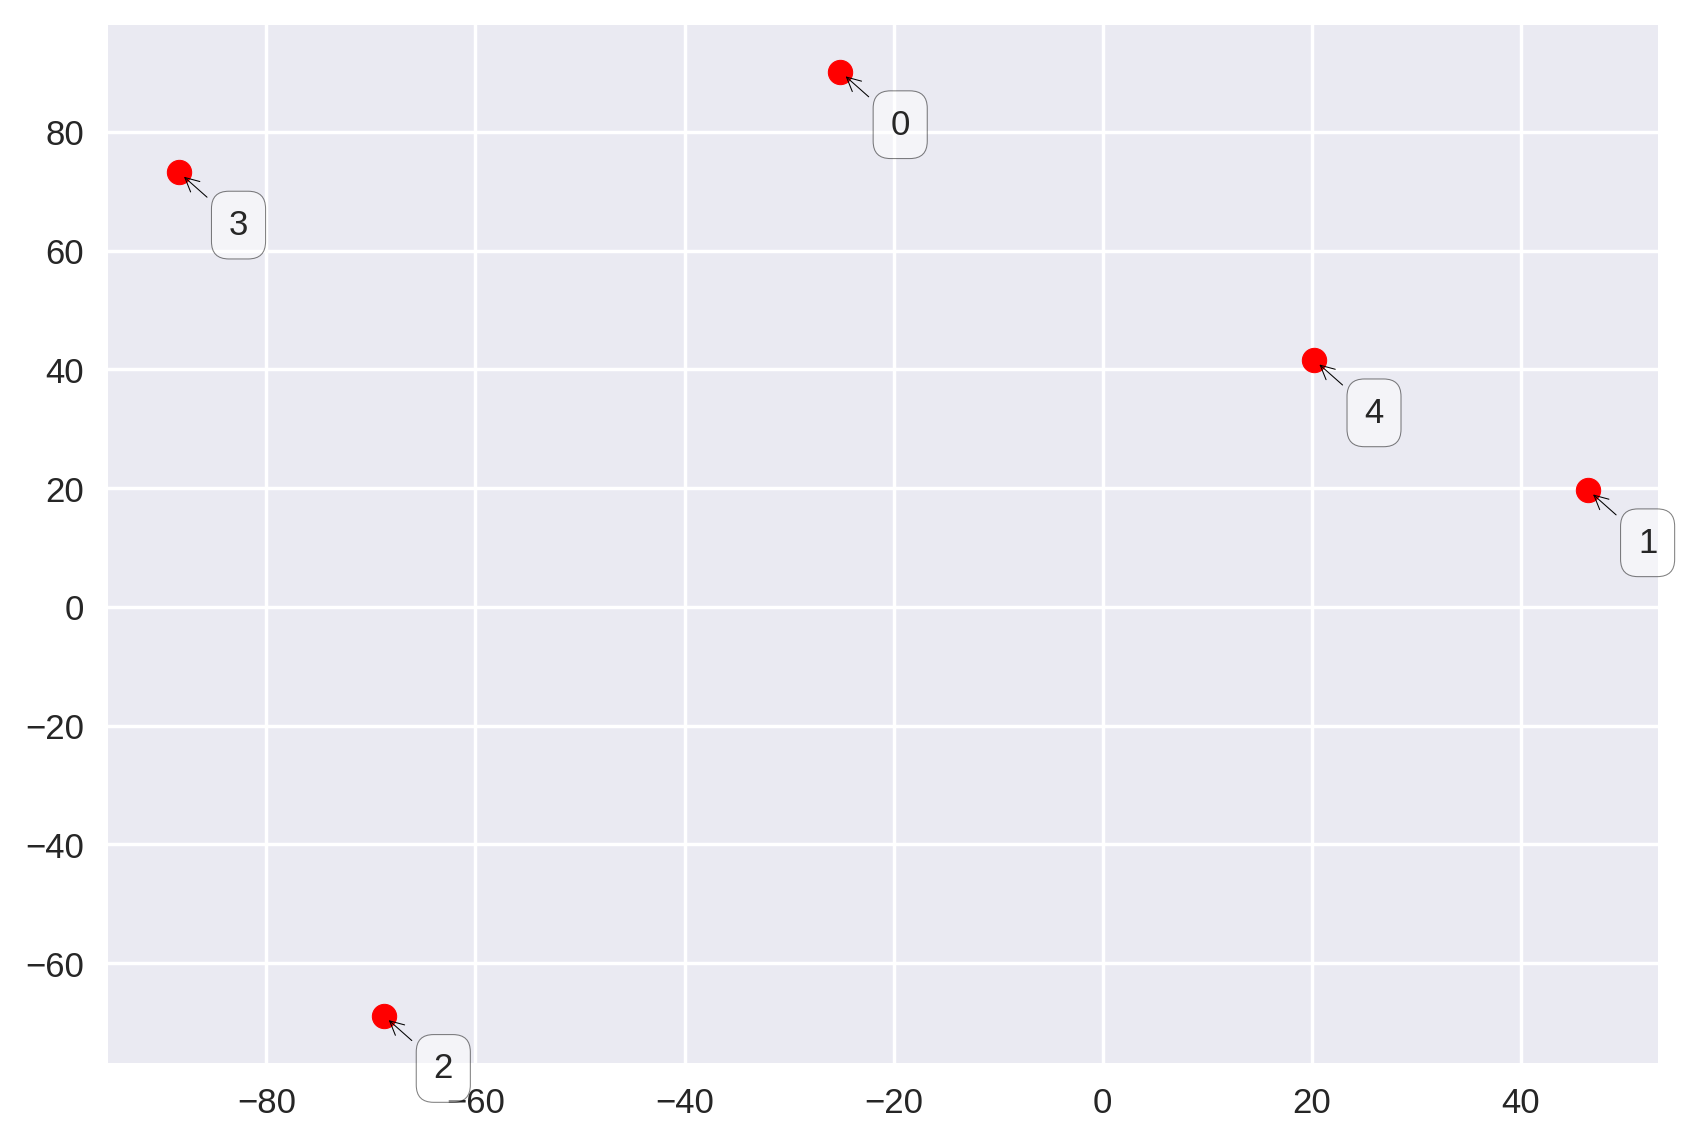

In [3]:
np.random.seed(42)

def make_cities(number_of_cities = 5):
    """
    Creates a series of cities by generating X, Y coordinates for
    each city and storing it in a dictionary for later lookup.
    """
    city_coordinates = {}

    for ix in range(number_of_cities):
        city_coordinates[ix] = list(np.random.uniform(-100,100,size=2))
        
    return city_coordinates

city_coordinates = make_cities()
print(city_coordinates)

def plot_cities(city_coordinates, annotate=True):
    """
    Makes a plot of all cities.
    Input: city_coordinates; dictionary of all cities and their coordinates in (x,y) format
    """
    names = []
    x = []
    y = []
    plt.figure(dpi=250)
    for ix, coord in city_coordinates.items():
        names.append(ix)
        x.append(coord[0])
        y.append(coord[1])
        if annotate:
            plt.annotate(ix, xy=(coord[0], coord[1]), xytext=(20, -20),
                        textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=0.5),
                        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.scatter(x,y,c='r',marker='o')
            
plot_cities(city_coordinates)

In [4]:
print(list(city_coordinates.keys()))

[0, 1, 2, 3, 4]


In [5]:
from copy import copy
def create_guess(cities):
    """
    Creates a possible path between all cities, returning to the original.
    Input: List of City IDs
    """
    guess = copy(cities)
    np.random.shuffle(guess)
    guess.append(guess[0])
    return list(guess)

create_guess(list(city_coordinates.keys()))

[0, 2, 3, 1, 4, 0]

[4, 2, 0, 3, 1, 4]


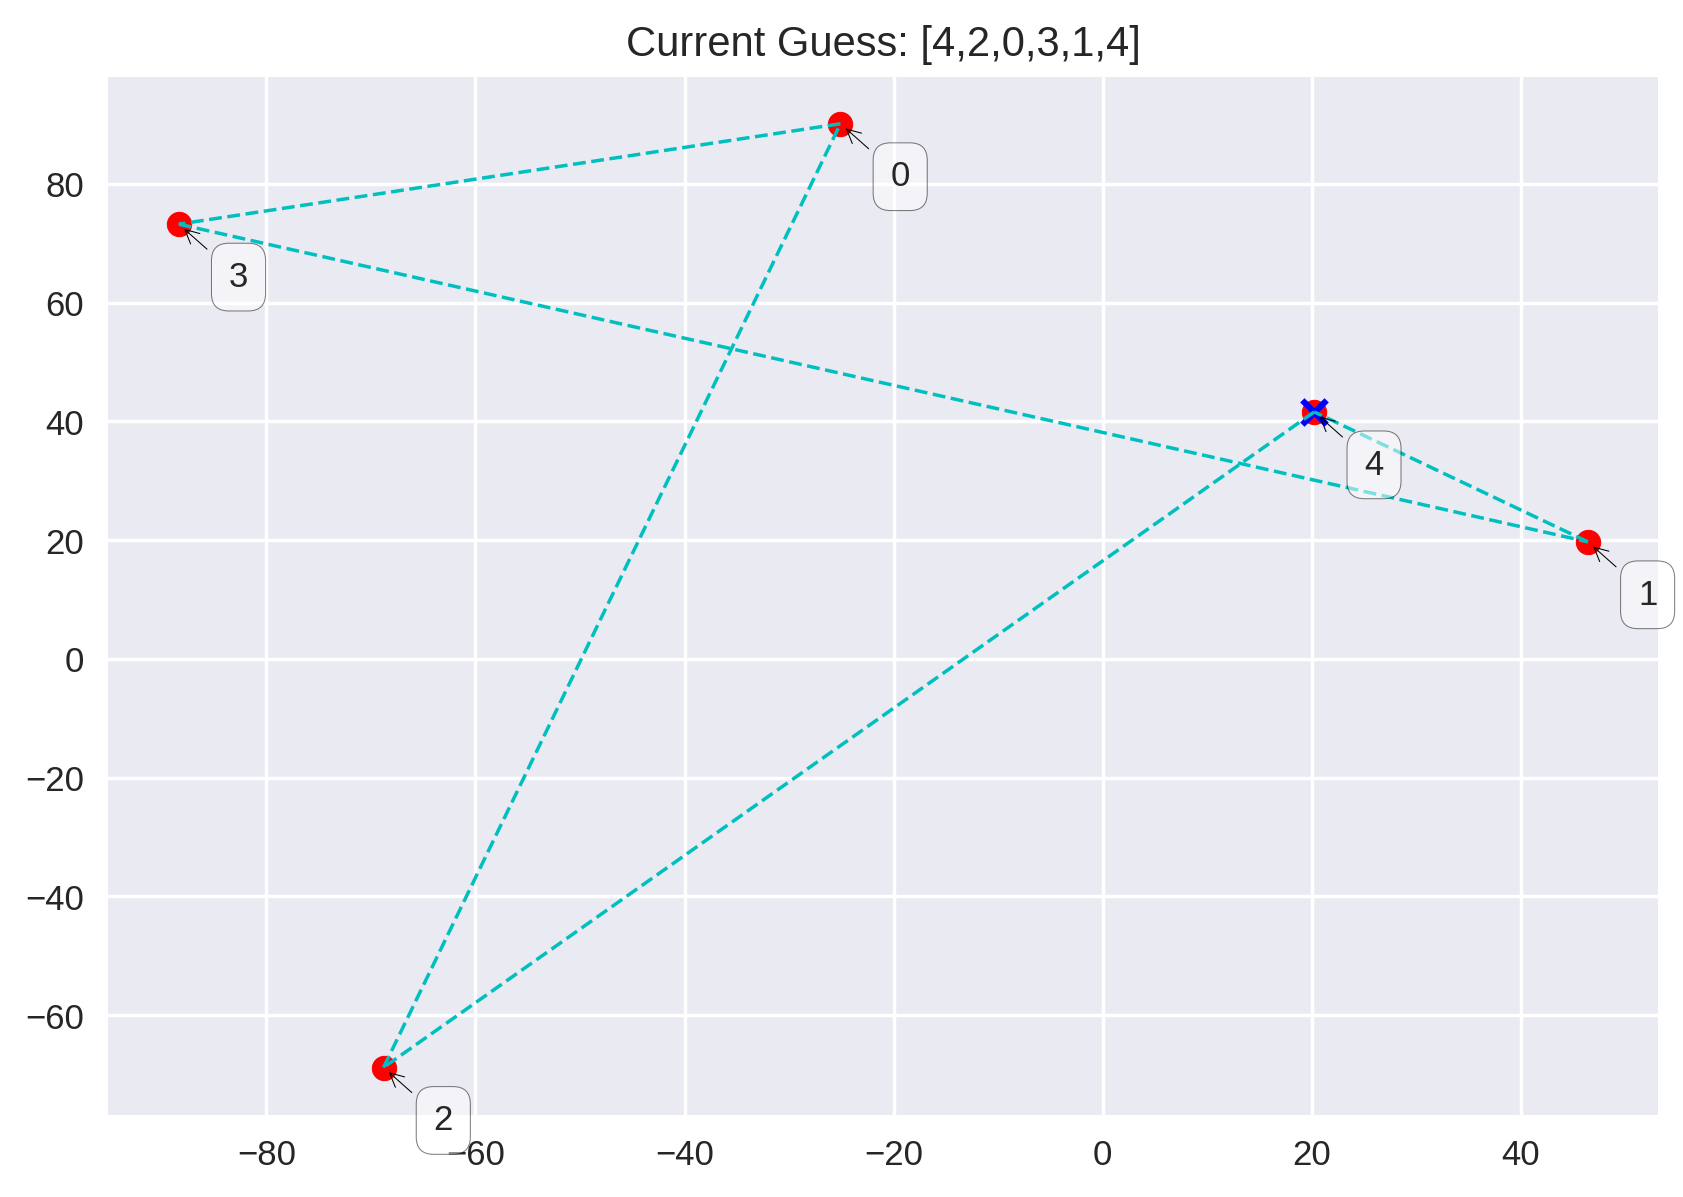

In [6]:
def plot_guess(city_coordinates, guess, guess_in_title=True):
    """
    Takes the coordinates of the cities and the guessed path and
    makes a plot connecting the cities in the guessed order
    Input:
    city_coordinate: dictionary of city id, (x,y)
    guess: list of ids in order
    """
    plot_cities(city_coordinates)
    for ix, current_city in enumerate(guess[:-1]):
        x = [city_coordinates[guess[ix]][0],city_coordinates[guess[ix+1]][0]]
        y = [city_coordinates[guess[ix]][1],city_coordinates[guess[ix+1]][1]]
        plt.plot(x,y,'c--',lw=1)
    plt.scatter(city_coordinates[guess[0]][0],city_coordinates[guess[0]][1], marker='x', c='b')   
    if guess_in_title:
        plt.title("Current Guess: [%s]"%(','.join([str(x) for x in guess])))
    else:
        print("Current Guess: [%s]"%(','.join([str(x) for x in guess])))
    
path = create_guess(list(city_coordinates.keys()))
print(path)
plot_guess(city_coordinates, path)

In [7]:
def create_generation(cities, population=100):
    """
    Makes a list of guessed city orders given a list of city IDs.
    Input:
    cities: list of city ids
    population: how many guesses to make
    """
    generation = [create_guess(cities) for _ in range(population)]
    return generation

test_generation = create_generation(list(city_coordinates.keys()), population=10)
print(test_generation)

[[2, 0, 4, 1, 3, 2], [1, 2, 4, 0, 3, 1], [0, 3, 1, 4, 2, 0], [0, 1, 2, 4, 3, 0], [0, 1, 4, 3, 2, 0], [1, 3, 4, 2, 0, 1], [3, 1, 2, 0, 4, 3], [4, 2, 1, 0, 3, 4], [2, 3, 4, 0, 1, 2], [0, 4, 2, 3, 1, 0]]


In [8]:
print(city_coordinates)

{0: [-25.091976230527507, 90.14286128198324], 1: [46.39878836228101, 19.73169683940732], 2: [-68.79627191151269, -68.80109593275947], 3: [-88.3832775663601, 73.23522915498702], 4: [20.223002348641756, 41.61451555920911]}


In [9]:
def distance_between_cities(city1_id, city2_id):
    """
    Given two cities, this calculates this distance between them
    """
    c1 = city_coordinates[city1_id]
    c2 = city_coordinates[city2_id]
    distance = np.sqrt((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2)
    return distance

def fitness_score(guess):
    """
    Loops through the cities in the guesses order and calculates
    how much distance the path would take to complete a loop.
    Lower is better.
    """
    score = 0
    for ix, city_id in enumerate(guess[:-1]):
        score += distance_between_cities(city_id, guess[ix+1])
    return score

def check_fitness(guesses):
    """
    Goes through every guess and calculates the fitness score. 
    Returns a list of tuples: (guess, fitness_score)
    """
    fitness_indicator = []
    for guess in guesses:
        fitness_indicator.append((guess, fitness_score(guess)))
    return fitness_indicator

print(check_fitness(test_generation))

[([2, 0, 4, 1, 3, 2], 553.75083654066), ([1, 2, 4, 0, 3, 1], 564.0368964304948), ([0, 3, 1, 4, 2, 0], 551.3159518245604), ([0, 1, 2, 4, 3, 0], 566.0860988216524), ([0, 1, 4, 3, 2, 0], 555.8000389318175), ([1, 3, 4, 2, 0, 1], 665.1458980053305), ([3, 1, 2, 0, 4, 3], 634.6540767109709), ([4, 2, 1, 0, 3, 4], 566.0860988216524), ([2, 3, 4, 0, 1, 2], 568.5209835377518), ([0, 4, 2, 3, 1, 0], 596.963602440954)]


Now we need to setup a breeding program. So what does that entail? We can't take random cities from each parent, we might get the same city in there twice. So instead we'll take a random set of the cities from parent 1 and hold them in place. Then well fill in with cities from parent 2, going left to right and making sure no duplicates occur.

In [10]:
def get_breeders_from_generation(guesses, take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1):
    """
    This sets up the breeding group for the next generation. You have
    to be very careful how many breeders you take, otherwise your
    population can explode. These two, plus the "number of children per couple"
    in the make_children function must be tuned to avoid exponential growth or decline!
    """
    # First, get the top guesses from last time
    fit_scores = check_fitness(guesses)
    sorted_guesses = sorted(fit_scores, key=lambda x: x[1]) # sorts so lowest is first, which we want
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]
    
    if verbose:
        # If we want to see what the best current guess is!
        print(best_guess)
    
    # Second, get some random ones for genetic diversity
    for _ in range(take_random_N):
        ix = np.random.randint(len(guesses))
        new_generation.append(guesses[ix])
        
    # No mutations here since the order really matters.
    # If we wanted to, we could add a "swapping" mutation,
    # but in practice it doesn't seem to be necessary
    
    np.random.shuffle(new_generation)
    return new_generation, best_guess

def make_child(parent1, parent2):
    """ 
    Take some values from parent 1 and hold them in place, then merge in values
    from parent2, filling in from left to right with cities that aren't already in 
    the child. 
    """
    list_of_ids_for_parent1 = list(np.random.choice(parent1, replace=False, size=len(parent1)//2))
    child = [-99 for _ in parent1]
    
    for ix in list_of_ids_for_parent1:
        child[ix] = parent1[ix]
    for ix, gene in enumerate(child):
        if gene == -99:
            for gene2 in parent2:
                if gene2 not in child:
                    child[ix] = gene2
                    break
    child[-1] = child[0]
    return child

def make_children(old_generation, children_per_couple=1):
    """
    Pairs parents together, and makes children for each pair. 
    If there are an odd number of parent possibilities, one 
    will be left out. 
    
    Pairing happens by pairing the first and last entries. 
    Then the second and second from last, and so on.
    """
    mid_point = len(old_generation)//2
    next_generation = [] 
    
    for ix, parent in enumerate(old_generation[:mid_point]):
        for _ in range(children_per_couple):
            next_generation.append(make_child(parent, old_generation[-ix-1]))
    return next_generation

In [11]:
make_child([0,1,2,3,4,5],[6,7,8,9,10,11])

[0, 1, 2, 6, 7, 0]

Let's look at a test cycle with our test_generation.

In [12]:
breeders, _ = get_breeders_from_generation(test_generation)
print(breeders)

[[0, 3, 1, 4, 2, 0], [0, 1, 4, 3, 2, 0], [0, 4, 2, 3, 1, 0], [2, 0, 4, 1, 3, 2], [3, 1, 2, 0, 4, 3], [0, 1, 2, 4, 3, 0], [2, 3, 4, 0, 1, 2], [0, 1, 2, 4, 3, 0], [0, 1, 2, 4, 3, 0], [1, 2, 4, 0, 3, 1], [1, 3, 4, 2, 0, 1], [1, 2, 4, 0, 3, 1], [4, 2, 1, 0, 3, 4], [4, 2, 1, 0, 3, 4], [2, 0, 4, 1, 3, 2]]


In [13]:
print(make_children(breeders, children_per_couple=2))

[[0, 3, 1, 2, 4, 0], [2, 3, 1, 4, 0, 2], [0, 4, 1, 3, 2, 0], [0, 1, 4, 3, 2, 0], [4, 0, 2, 3, 1, 4], [0, 4, 2, 3, 1, 0], [2, 0, 4, 1, 3, 2], [2, 0, 4, 1, 3, 2], [1, 3, 2, 0, 4, 1], [1, 3, 2, 0, 4, 1], [0, 1, 2, 4, 3, 0], [2, 1, 0, 4, 3, 2], [2, 3, 1, 0, 4, 2], [2, 3, 1, 0, 4, 2]]


Sweet, it looks like our parents features are being carried on, but aren't being directly copies. So all is going how we hoped for now. Now let's try actually solving the problem by letting many generations happen and turning up how many guesses there are in the initial generation.

In [14]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
print_every_n_generations = 5

for i in range(100):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                        take_best_N=250, take_random_N=100, 
                                                        verbose=is_verbose)
    current_generation = make_children(breeders, children_per_couple=3)
    

Generation 0: 500
[1, 4, 0, 3, 2, 1]
Generation 5: 525
[1, 4, 0, 3, 2, 1]
Generation 10: 525
[4, 0, 3, 2, 1, 4]
Generation 15: 525
[4, 0, 3, 2, 1, 4]
Generation 20: 525
[4, 0, 3, 2, 1, 4]
Generation 25: 525
[4, 0, 3, 2, 1, 4]
Generation 30: 525
[4, 0, 3, 2, 1, 4]
Generation 35: 525
[4, 0, 3, 2, 1, 4]
Generation 40: 525
[4, 0, 3, 2, 1, 4]
Generation 45: 525
[4, 0, 3, 2, 1, 4]
Generation 50: 525
[4, 0, 3, 2, 1, 4]
Generation 55: 525
[4, 0, 3, 2, 1, 4]
Generation 60: 525
[4, 0, 3, 2, 1, 4]
Generation 65: 525
[4, 0, 3, 2, 1, 4]
Generation 70: 525
[4, 0, 3, 2, 1, 4]
Generation 75: 525
[4, 0, 3, 2, 1, 4]
Generation 80: 525
[4, 0, 3, 2, 1, 4]
Generation 85: 525
[4, 0, 3, 2, 1, 4]
Generation 90: 525
[4, 0, 3, 2, 1, 4]
Generation 95: 525
[4, 0, 3, 2, 1, 4]


Let's put this into a function so we can repeat it with different sets of stuff.

In [15]:
def evolve_to_solve(current_generation, max_generations, take_best_N, take_random_N,
                    mutation_rate, children_per_couple, print_every_n_generations, verbose=False):
    """
    Takes in a generation of guesses then evolves them over time using our breeding rules.
    Continue this for "max_generations" times.
    Inputs:
    current_generation: The first generation of guesses
    max_generations: how many generations to complete
    take_best_N: how many of the top performers get selected to breed
    take_random_N: how many random guesses get brought in to keep genetic diversity
    mutation_rate: How often to mutate (currently unused)
    children_per_couple: how many children per breeding pair
    print_every_n_geneartions: how often to print in verbose mode
    verbose: Show printouts of progress
    Returns:
    fitness_tracking: a list of the fitness score at each generations
    best_guess: the best_guess at the end of evolution
    """
    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: "%i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                            take_best_N=take_best_N, take_random_N=take_random_N, 
                                                            verbose=is_verbose, mutation_rate=mutation_rate)
        fitness_tracking.append(fitness_score(best_guess))
        current_generation = make_children(breeders, children_per_couple=children_per_couple)
    
    return fitness_tracking, best_guess

current_generation = create_generation([0,1,2,3,4],population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 100, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 10: 330
Current Best Score:  454.6910373569818
[1, 4, 0, 3, 2, 1]
Generation 15: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 20: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 25: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 30: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 35: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 40: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 45: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 50: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 55: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 60: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]
Generation 65: 330
Current Best Score:  454.6910373569818
[4, 0, 3, 2, 1, 4]


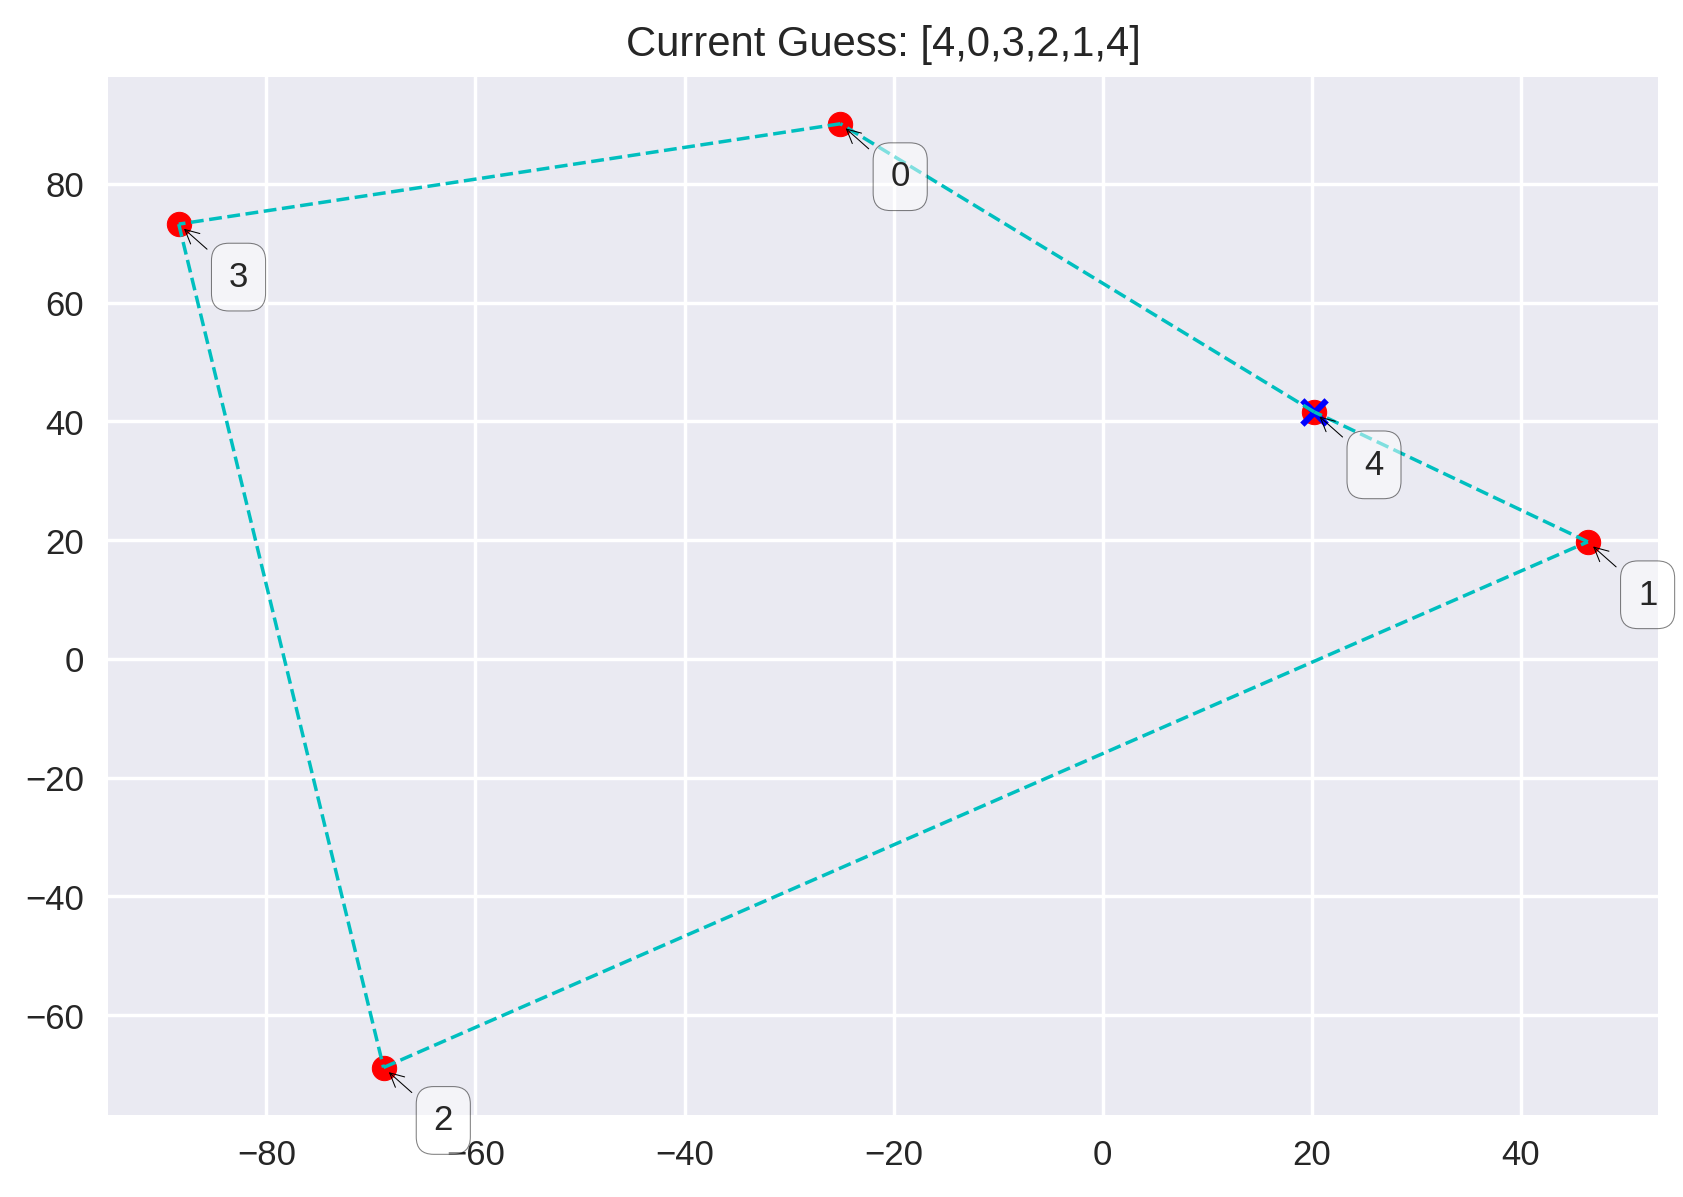

In [16]:
plot_guess(city_coordinates, best_guess)

Looks like our fitness plot will be really boring since it got the answer REALLY fast. That's because this is a simple problem with only 5 cities. Let's check anyway.

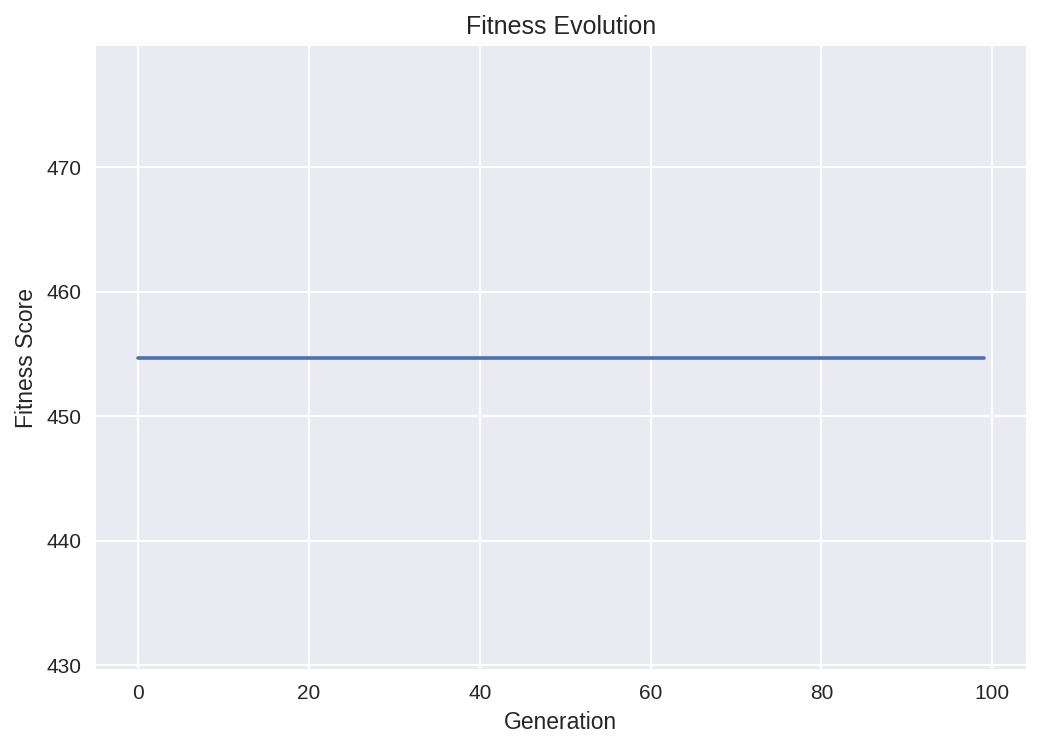

In [17]:
def make_fitness_tracking_plot(fitness_tracking):
    """
    Given a list of fitness scores, plot it versus the generation number
    """
    plt.figure(dpi=150)
    plt.plot(range(len(fitness_tracking)), fitness_tracking)
    plt.ylabel("Fitness Score")
    plt.xlabel("Generation")
    plt.title("Fitness Evolution");

make_fitness_tracking_plot(fitness_tracking)

# Now let's try it with a bigger more challenging problem

In the above problem there were only 5! permutations allowed. That's only 120 unique combinations and is pretty easy to solve. However, if we have 20 cities... there are 20! = 2.432902e+18 permutations possible. That's pretty much out of the realm of possibility for brute force. So let's see if we can get a decent answer in a usable amount of time. This should also let us see more interesting behavior in our fitness function.

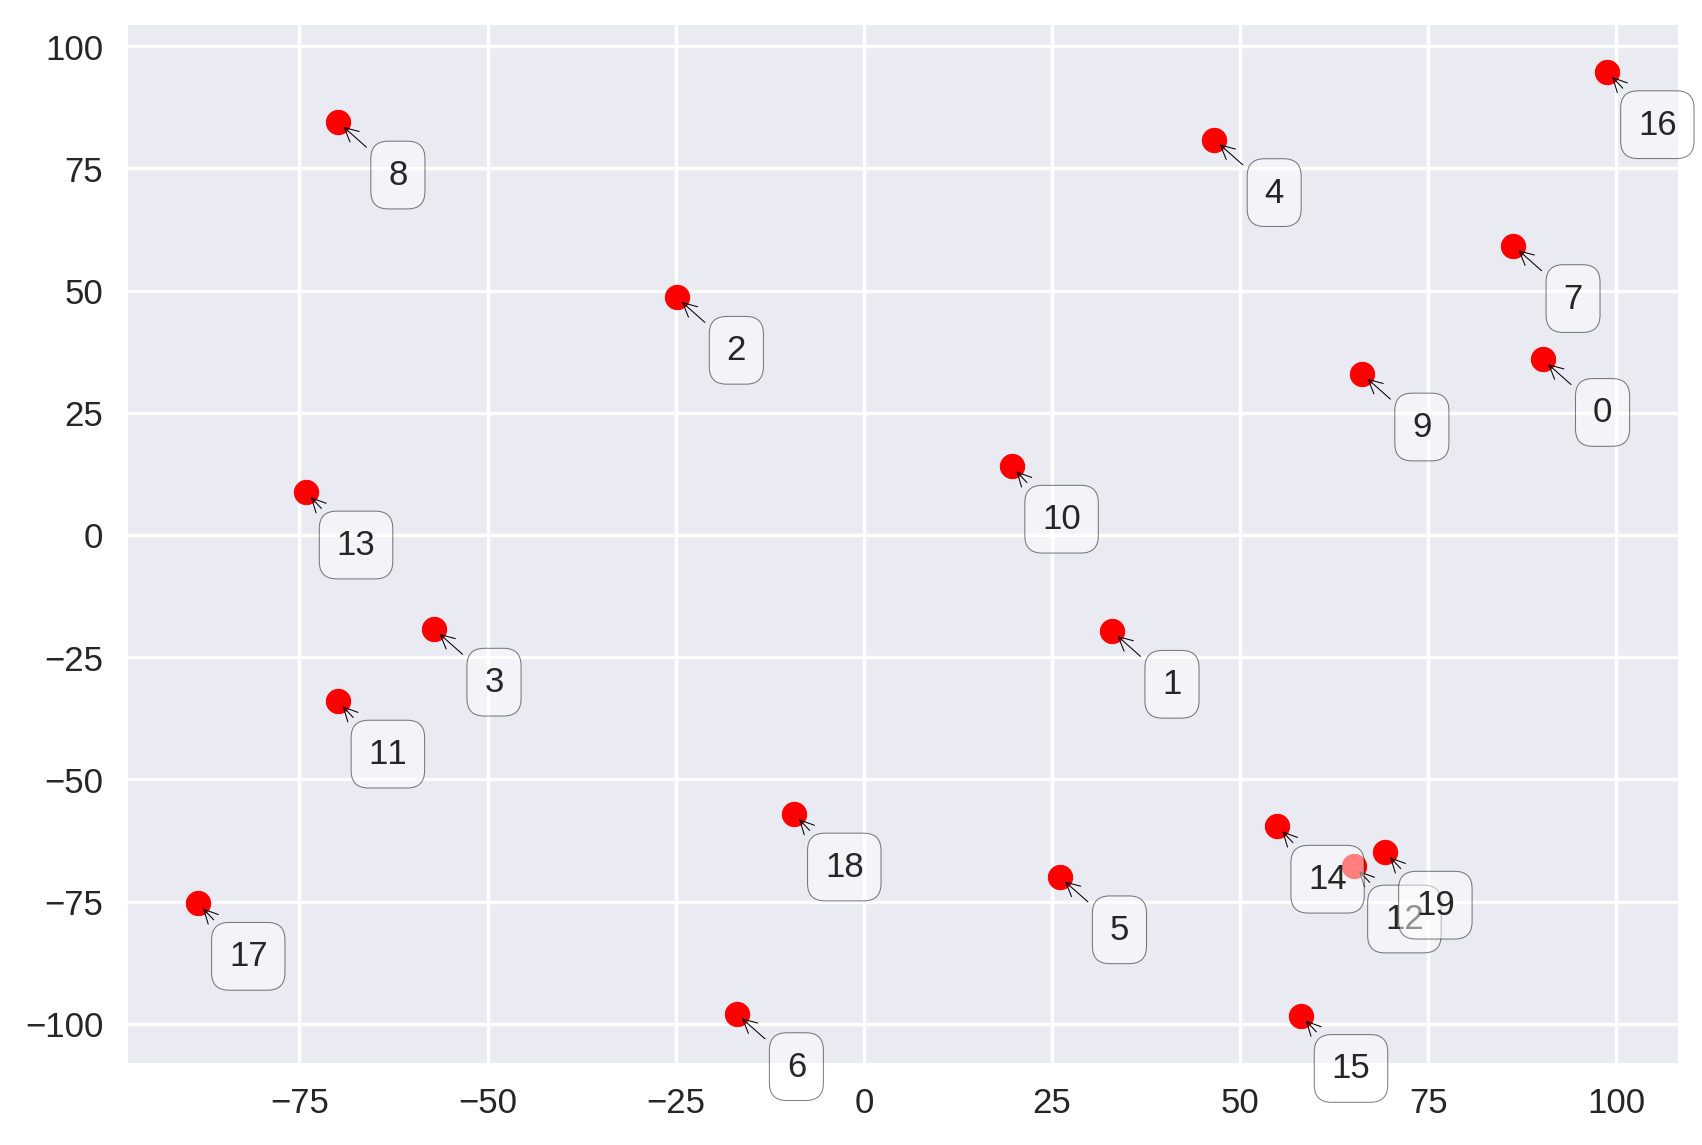

In [18]:
city_coordinates = make_cities(20)
plot_cities(city_coordinates)

In [19]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 150, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  1557.7877827752443
[19, 14, 15, 10, 2, 13, 11, 12, 0, 7, 9, 18, 6, 17, 8, 3, 5, 1, 4, 16, 19]
Generation 10: 330
Current Best Score:  1742.2916361694597
[5, 15, 19, 3, 11, 10, 1, 2, 17, 18, 6, 12, 14, 9, 7, 13, 8, 4, 0, 16, 5]
Generation 15: 330
Current Best Score:  1550.7821423093403
[19, 0, 16, 7, 4, 15, 14, 13, 3, 17, 5, 6, 2, 11, 8, 18, 10, 9, 1, 12, 19]
Generation 20: 330
Current Best Score:  1616.988454714405
[14, 5, 19, 11, 18, 6, 17, 3, 15, 13, 2, 8, 4, 16, 1, 12, 0, 10, 9, 7, 14]
Generation 25: 330
Current Best Score:  1578.157559875794
[7, 16, 9, 0, 1, 15, 14, 13, 5, 12, 19, 8, 2, 3, 17, 6, 11, 18, 4, 10, 7]
Generation 30: 330
Current Best Score:  1568.70276691603
[4, 16, 7, 0, 9, 15, 19, 3, 2, 10, 1, 13, 11, 5, 12, 18, 14, 6, 17, 8, 4]
Generation 35: 330
Current Best Score:  1480.46274357236
[10, 0, 16, 9, 7, 4, 14, 12, 18, 19, 15, 5, 17, 6, 8, 3, 11, 2, 13, 1, 10]
Generation 40: 330
Current Best Score:  1412.9994019674944
[0, 7, 16, 4,

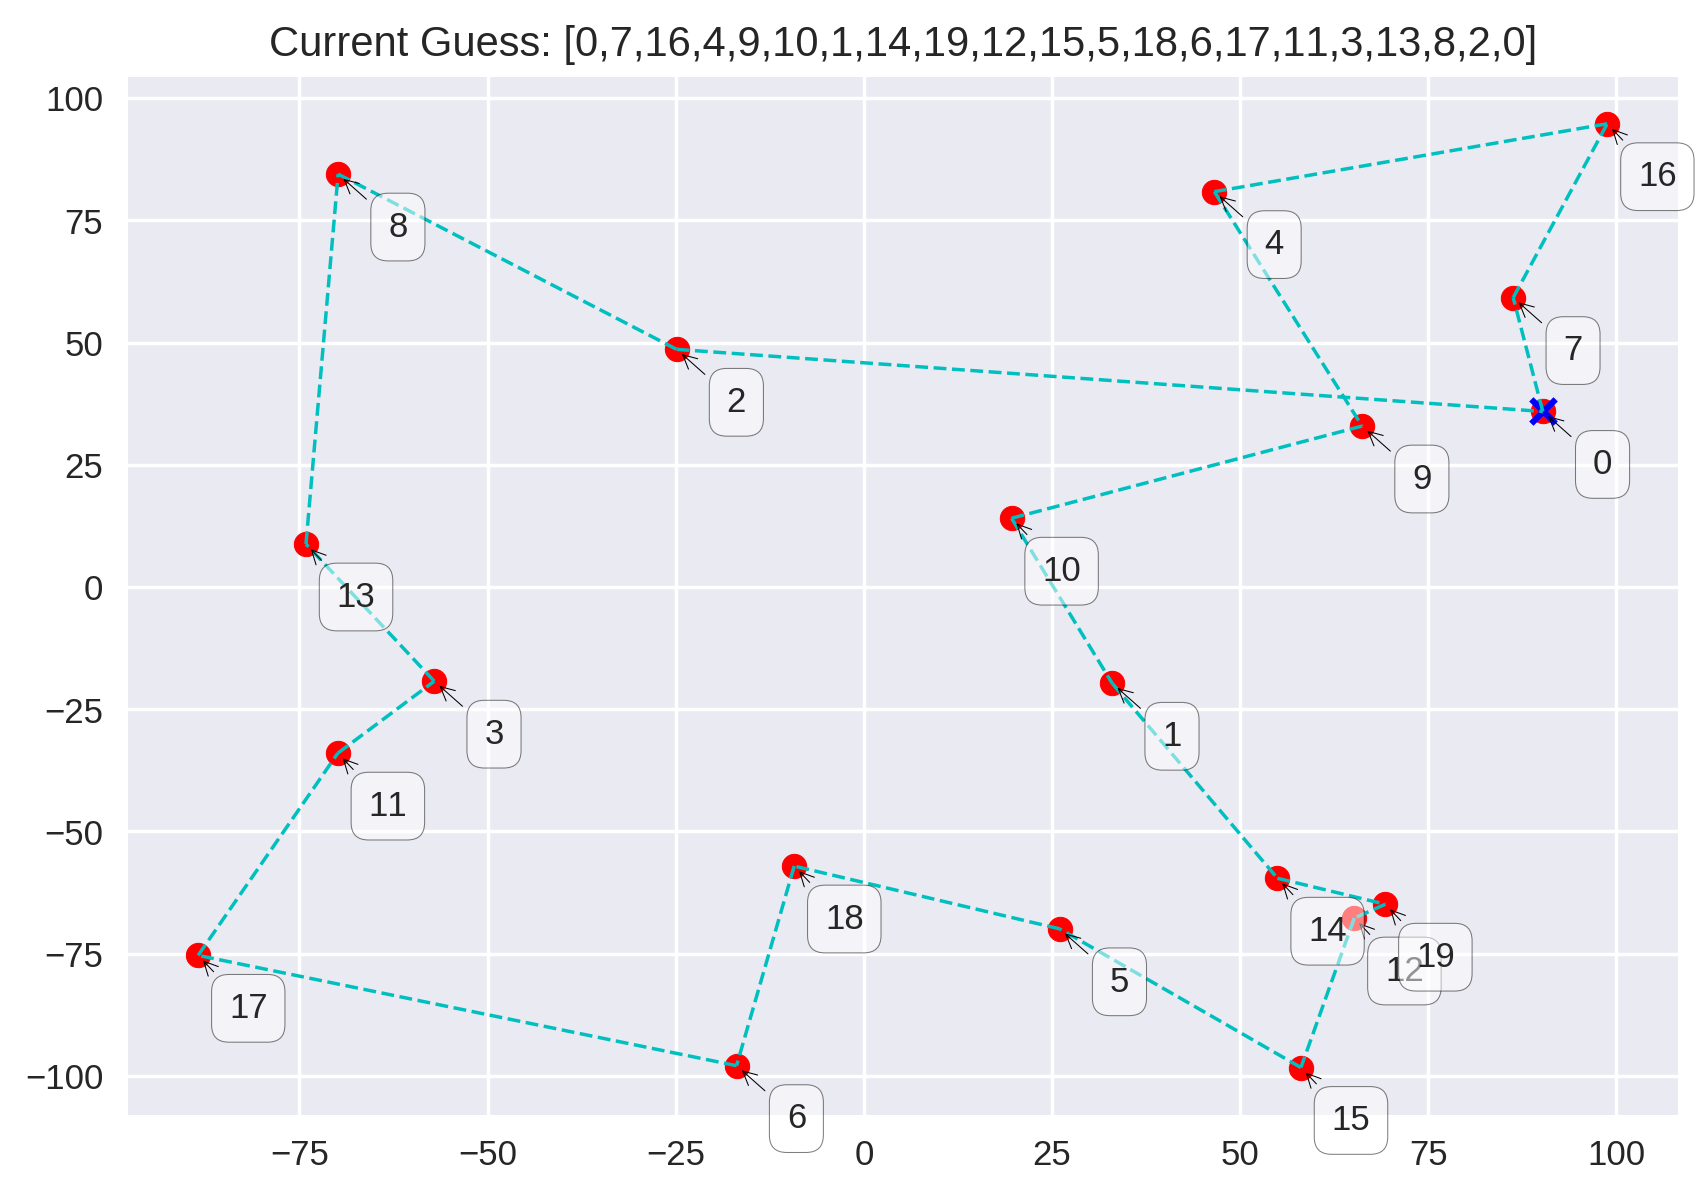

In [20]:
plot_guess(city_coordinates, best_guess)

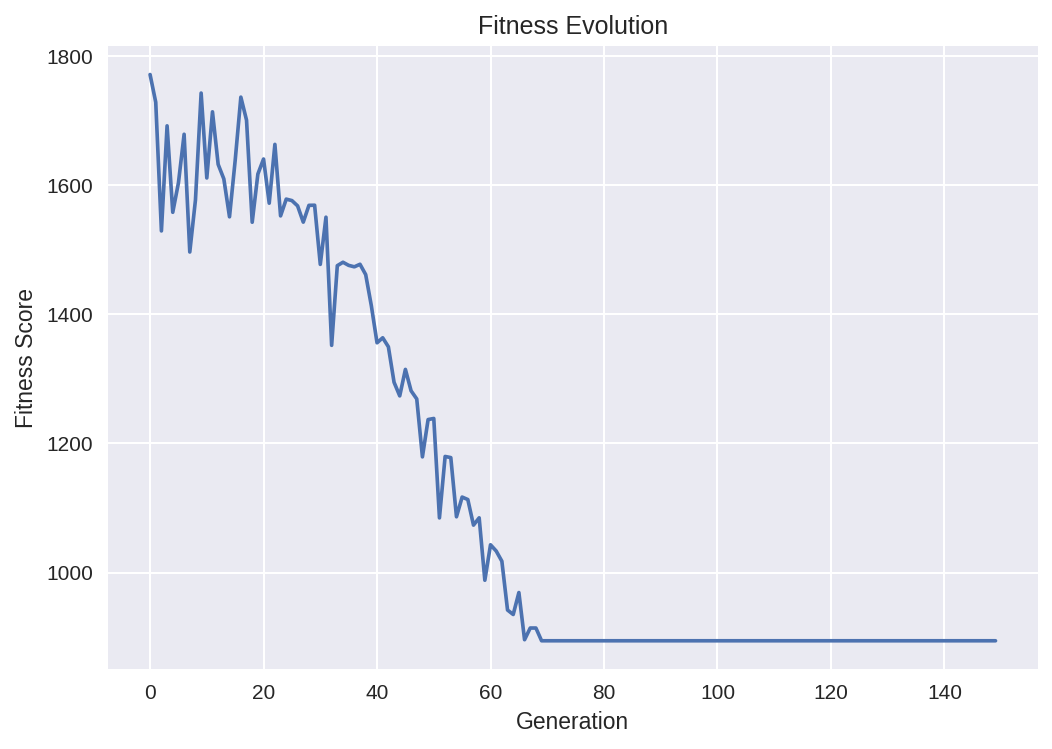

In [21]:
make_fitness_tracking_plot(fitness_tracking)

Awesome! It found a really good looking path that's pretty intuitive. It also converged REALLY quickly. So what if we have 50 cities? That's 3.0414e+64 permutations. That's an unbelievably large number of permutations. We'd never be able to solve that with a "normal" approach. Let's try ours.

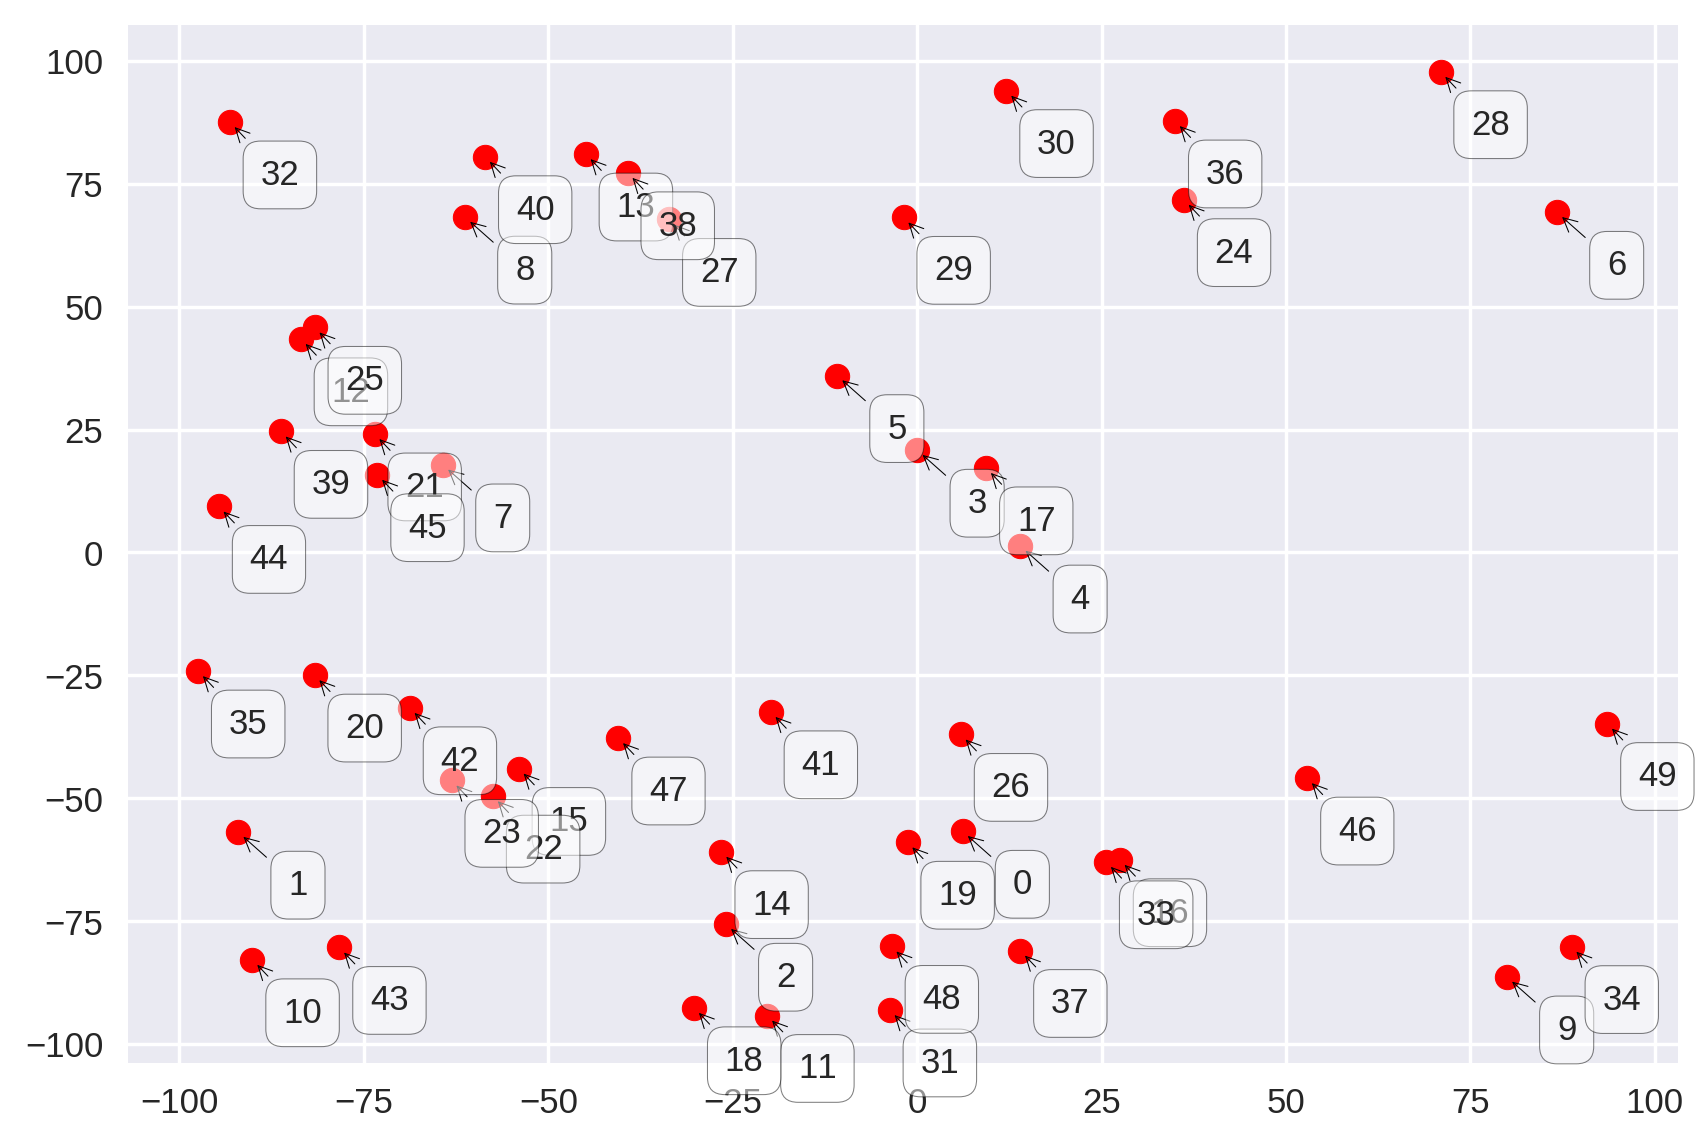

In [22]:
city_coordinates = make_cities(50)
plot_cities(city_coordinates)

In [23]:
current_generation = create_generation(list(city_coordinates.keys()),population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 300, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  4024.8432227251537
[14, 2, 11, 34, 19, 35, 16, 21, 23, 42, 22, 28, 6, 8, 29, 12, 25, 47, 26, 3, 24, 9, 48, 27, 40, 32, 18, 7, 5, 20, 43, 31, 36, 37, 10, 49, 30, 17, 46, 0, 33, 13, 4, 41, 39, 44, 1, 15, 45, 38, 14]
Generation 10: 330
Current Best Score:  4232.51616350956
[4, 49, 34, 33, 48, 2, 17, 0, 23, 20, 38, 32, 6, 13, 40, 26, 14, 8, 29, 25, 41, 18, 47, 1, 39, 44, 12, 5, 43, 22, 10, 37, 31, 19, 35, 15, 28, 11, 16, 9, 46, 21, 42, 7, 24, 30, 45, 3, 36, 27, 4]
Generation 15: 330
Current Best Score:  4117.553061604717
[49, 34, 26, 15, 24, 13, 23, 31, 39, 47, 35, 19, 2, 18, 48, 22, 42, 14, 45, 17, 28, 30, 6, 44, 43, 12, 29, 41, 4, 32, 36, 16, 33, 11, 20, 0, 25, 38, 8, 46, 5, 40, 21, 7, 10, 1, 27, 3, 37, 9, 49]
Generation 20: 330
Current Best Score:  4227.389080438107
[15, 11, 31, 14, 34, 2, 37, 23, 49, 9, 48, 47, 45, 3, 12, 8, 35, 10, 27, 29, 17, 40, 13, 38, 20, 42, 7, 39, 21, 22, 44, 5, 24, 25, 0, 16, 19, 1, 18, 43, 36, 32, 46, 6, 41, 33, 4, 28, 30

Current Guess: [49,34,9,46,16,33,4,26,0,19,37,48,31,11,18,2,14,41,47,15,22,23,43,10,1,42,20,35,44,45,7,21,39,12,25,32,8,40,13,38,27,5,3,17,29,30,36,24,28,6,49]


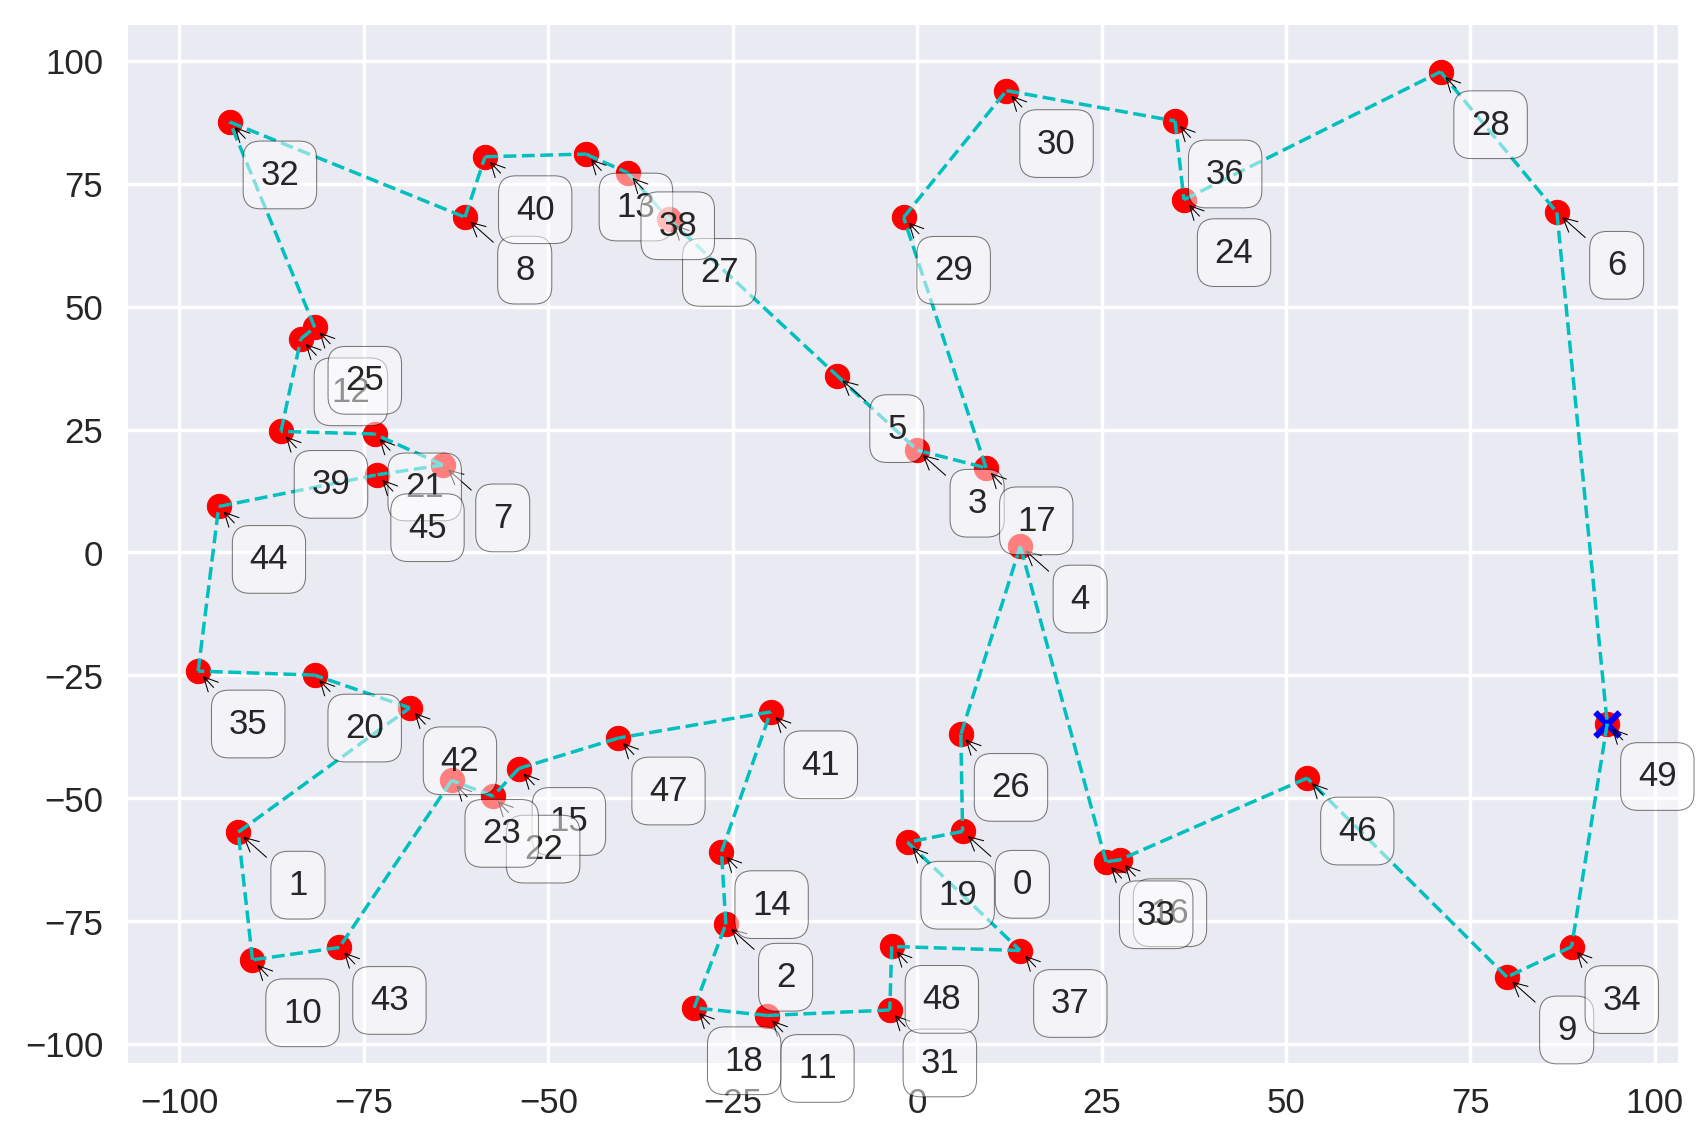

In [24]:
plot_guess(city_coordinates, best_guess, guess_in_title=False)

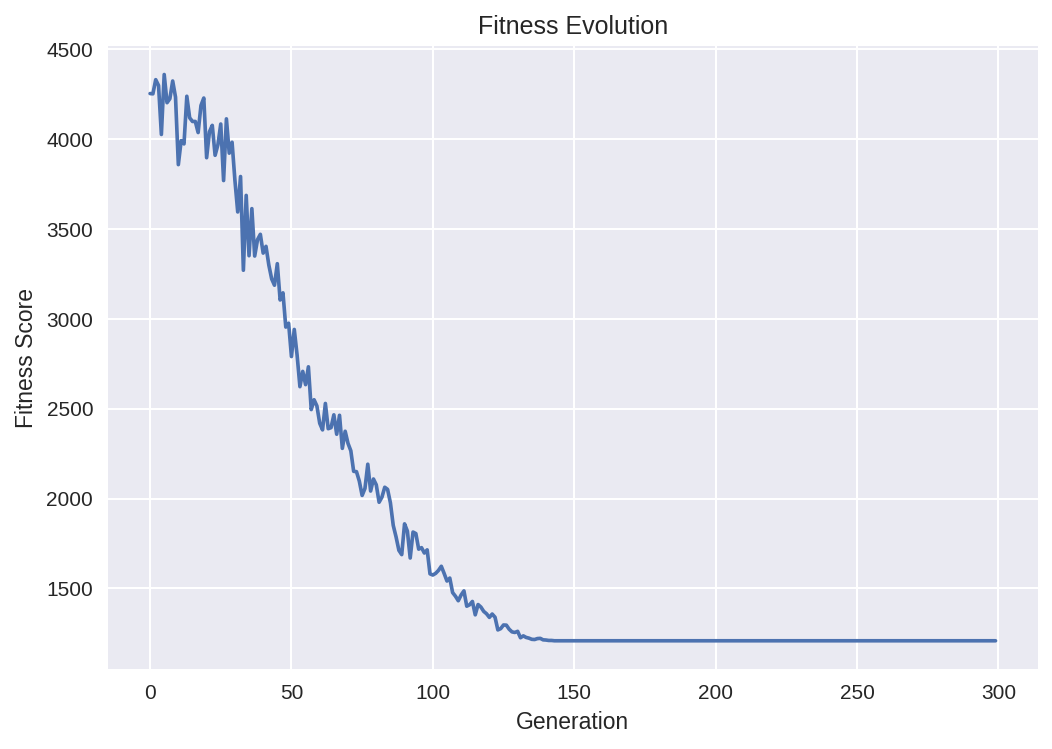

In [25]:
make_fitness_tracking_plot(fitness_tracking)

Look at that awesome path! When you just look at the cities with no path, it looks like a mess. With this algorithm in-place, now we can see an easy path and it looks so natural. On top of that, despite there being 10^64 permutations... this ran in just seconds and solved it for us. Now, this isn't the ABSOLUTE best answer, it's an approximation. It's possible that we're only close to the best answer. But that's a small price to pay for being able to answer the question so quickly.